In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py
import numpy as np
import os

In [4]:
# load data
data = h5py.File("../../../Data/ECoG/Original/EC2_blocks_1_8_9_15_76_89_105_CV_HG_align_window_-0.5_to_0.79_file_nobaseline.h5")
X_data = data['Xhigh gamma'][:]
y_data = data['y'][:] # phoneme label

In [5]:
# preprocessing
X_data = np.divide(X_data, np.amax(X_data)) # normalize ECoG signal

In [6]:
# sort by phonemes
sort_order = y_data.argsort() # sort by phonemes
X_data = X_data[sort_order]
y_data = y_data[sort_order]

In [7]:
# calculate averages for each phoneme
X_averages = []
for phoneme in range(max(y_data)+1):
    indices = [y_data == phoneme]
    X_averages.append(np.mean(X_data[indices], axis=0))

In [10]:
import pymf
import seaborn as sb

In [11]:
CUR = pymf.CUR(X_data[0])
CUR.factorize()

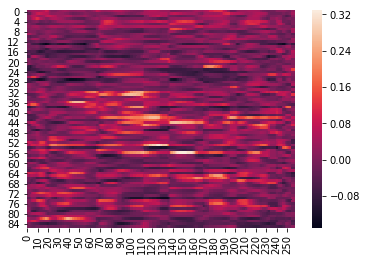

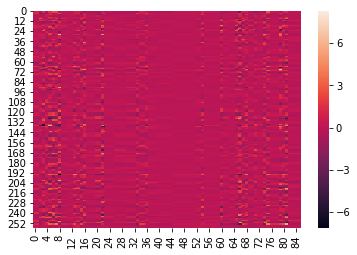

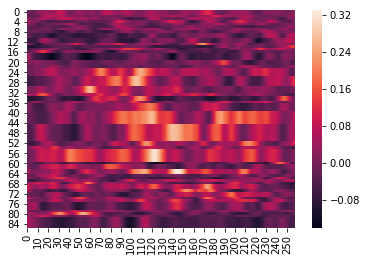

In [12]:
sb.heatmap(CUR.U);
plt.show()
sb.heatmap(CUR.S);
plt.show()
sb.heatmap(CUR.V);
plt.show()